Removed no burn in
Removed no burn in
Removed no burn in


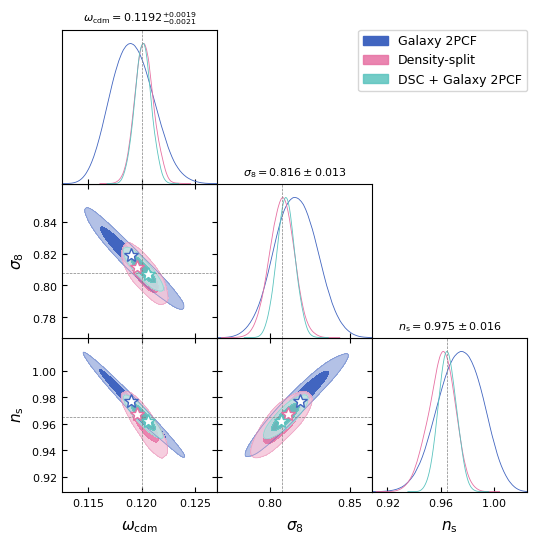

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from acm.data.control_plots import ControlPlots
from acm.data.default import labels_stats as label_dict
colors = ["#4165c0", "#e770a2", "#5ac3be", "#696969", "#f79a1e", "#ba7dcd"]

object = ControlPlots()

chain_dir = '/pscratch/sd/s/sbouchar/acm/bgs/chains/fixed_assembly/c000_hod096/'
chain = object.load_chain(chain_dir + 'tpcf_chain.npy', label='tpcf')
chain = object.load_chain(chain_dir + 'dsc_conf_chain.npy', label='dsc_conf')
chain = object.load_chain(chain_dir + 'tpcf+dsc_conf_chain.npy', label='tpcf+dsc_conf')

cosmo_params = ['omega_cdm', 'sigma8_m', 'n_s', ]#, 'omega_b', 'nrun', 'N_ur', 'w0_fld', 'wa_fld']
hod_params = ['logM_cut', 'logM_1', 'alpha', 'kappa', 'sigma', 'alpha_c', 'alpha_s']#, 'B_cen', 'B_sat', ]
g = object.plot_triangle(add_bestfit=True, markers=chain['markers'], title_limit=1, filled=True, colors=colors, label_dict=label_dict, params=cosmo_params)
plt.show();

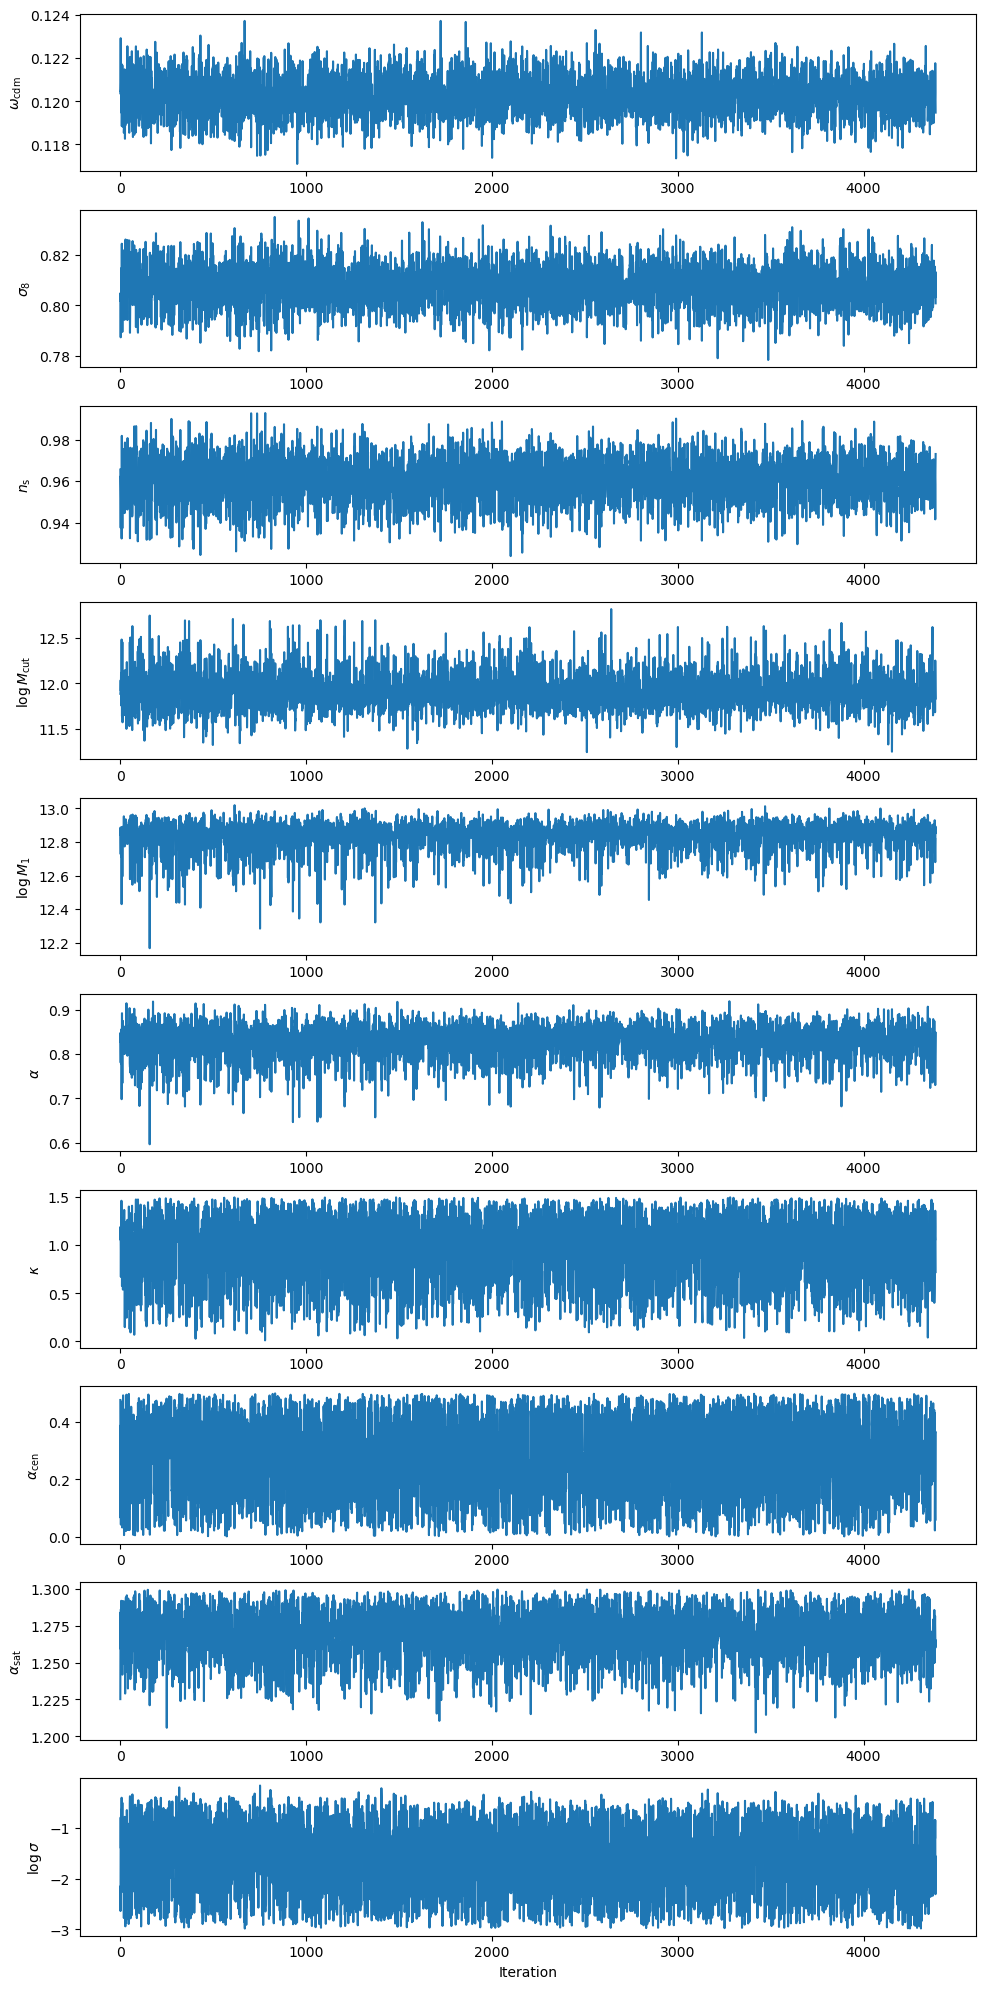

In [6]:
object.plot_trace(label='tpcf');